In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import pandas_market_calendars as mcal

data = pd.read_csv("https://raw.githubusercontent.com/leosmigel/analyzingalpha/master/sp500-historical-components-and-changes/sp500_history.csv",index_col=0)

In [2]:
cutoff = dt.datetime.today().strftime('%Y-%m-%d')

In [3]:
class sectors:

    def __init__(self, start_date = np.NaN, end_date = np.NaN):
        self.VANGUARD = \
            [ \
            "VGT", \
            "VHT", \
            "VCR", \
            "VOX", \
            "VFH", \
            "VIS", \
            "VDC", \
            "VPU", \
            "VAW", \
            "VNQ", \
            "VDE" \
            ]

        self.SPDR = \
            [ \
            "XLK", \
            "XLV", \
            "XLY", \
            "XLC", \
            "XLF", \
            "XLI", \
            "XLP", \
            "XLU", \
            "XLB", \
            "XLRE", \
            "XLE" \
            ]

        self.sectors = \
            [ \
            "Information Technology",\
            "Health Care",\
            "Consumer Discretionary",\
            "Communication Services",\
            "Financials",\
            "Industrials",\
            "Consumer Staples",\
            "Utilities",\
            "Materials",\
            "Real Estate",\
            "Energy"\
            ]

    def get_Vanguard(self):
        return(self.VANGUARD)

    def get_sectors(self):
        return(self.sectors)
    
    def get_SPDR(self):
        return(self.SPDR) 
    
    

In [4]:
sectors_ = sectors()
print(sectors_.get_Vanguard())
print(sectors_.get_sectors())
print(sectors_.get_SPDR())

['VGT', 'VHT', 'VCR', 'VOX', 'VFH', 'VIS', 'VDC', 'VPU', 'VAW', 'VNQ', 'VDE']
['Information Technology', 'Health Care', 'Consumer Discretionary', 'Communication Services', 'Financials', 'Industrials', 'Consumer Staples', 'Utilities', 'Materials', 'Real Estate', 'Energy']
['XLK', 'XLV', 'XLY', 'XLC', 'XLF', 'XLI', 'XLP', 'XLU', 'XLB', 'XLRE', 'XLE']


In [5]:
end_ = dt.datetime.strptime(cutoff, "%Y-%m-%d").date()

start_ = end_ - dt.timedelta(weeks=104)

nyse = mcal.get_calendar('NYSE')

#max lag due to indicators
n = 26

start = start_#date_time[0]
early_start = (dt.datetime.strptime(start.strftime('%Y-%m-%d'), '%Y-%m-%d') - pd.tseries.offsets.BusinessDay(n = np.max([n])+5)).strftime('%Y-%m-%d')
end = (dt.datetime.strptime(str(end_), '%Y-%m-%d') + pd.tseries.offsets.BusinessDay(n = 1)).strftime('%Y-%m-%d')#date_time[-1]

early = nyse.schedule(start_date=early_start, end_date=end)

In [6]:
stocks=sectors_.get_Vanguard()
names = sectors_.get_sectors()
stocks.append('^GSPC')
names.append('^GSPC')

In [7]:
#stocks = ['ORCL', 'TSLA', 'IBM','YELP', 'MSFT']
ls_key = 'Adj Close'

In [8]:
#import pandas_datareader.data as web
#f = web.DataReader(stocks, 'yahoo',early_start,end)

from finquant.portfolio import build_portfolio

pf_pre = build_portfolio(
    names=stocks, start_date=early_start, end_date=end, data_api="yfinance"
)

[*********************100%***********************]  12 of 12 completed


In [12]:
data_ = pf_pre.data.pct_change().asfreq('Q', method='pad').iloc[1:]
#templist = sectors_.get_sectors()
data_.columns = names
data_.index = data_.index.strftime('%Y-%m-%d')

2019-12-31


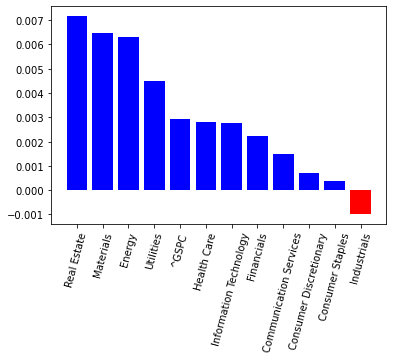

2020-03-31


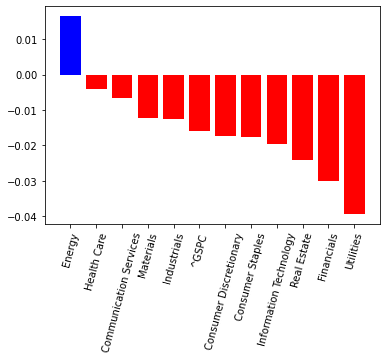

2020-06-30


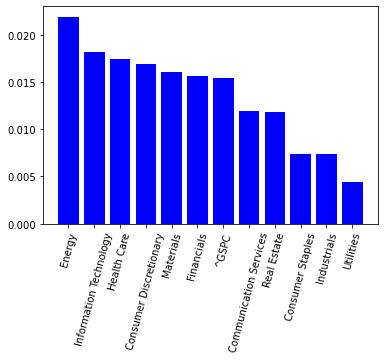

2020-09-30


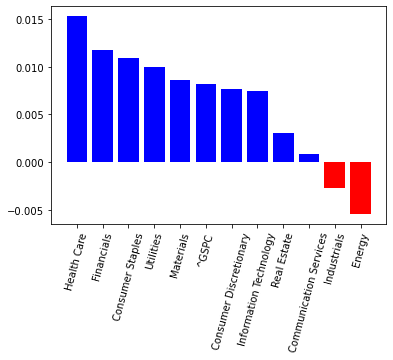

2020-12-31


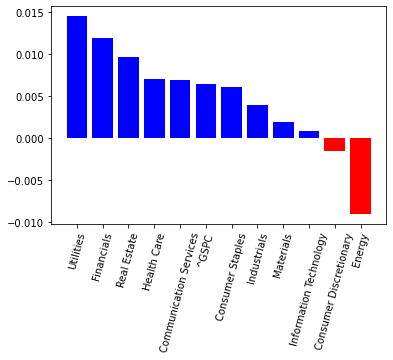

2021-03-31


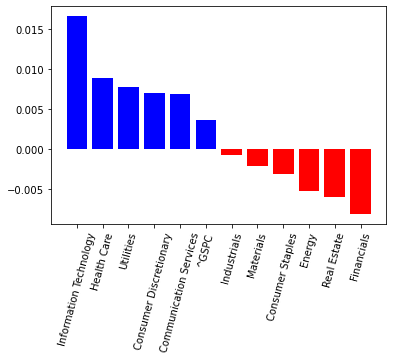

2021-06-30


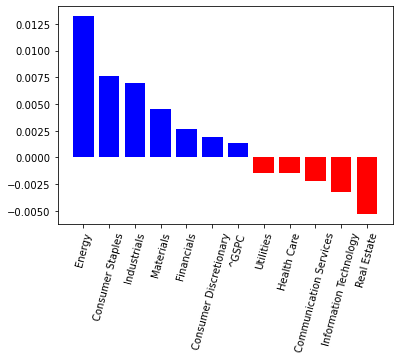

In [13]:
import matplotlib.pyplot as plt

for i in data_.index:
    print(i)
    x = data_.loc[i].sort_values(kind="quicksort", ascending=False)
    x_pos = x.index
    
    cc=['colors']*len(x.index)
    for n,val in enumerate(x):
        #print(n)
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    #plt.bar(x_pos, x,color=color_map(data_normalizer(likeability_scores)))
    plt.bar(x_pos, x,color = cc)
    
    #plt.xlabel("Energy Source")
    #plt.ylabel("Energy Output (GJ)")
    #plt.title("Energy output from various fuel sources")

    plt.xticks(range(0,len(x_pos)),x_pos, rotation = 75,size=10)

    plt.show()

In [11]:
'''
dates = sp500_adjustments['date'][sp500_adjustments['date']<=cutoff].unique()

for d in dates:
    print(d)
    
    #sp500_adjustments['variable']=="added_ticker"] && 
    adds = sp500_adjustments[((sp500_adjustments['date']<=d) & (sp500_adjustments['variable']=="added_ticker"))]
    add_names, add_counts = np.unique(adds.name, return_counts=True)

    dels = sp500_adjustments[((sp500_adjustments['date']<=d) & (sp500_adjustments['variable']=="removed_ticker"))]
    del_names, del_counts = np.unique(dels.name, return_counts=True)

    df = pd.concat([pd.concat([pd.DataFrame(add_names),pd.DataFrame(add_counts)],axis=1,ignore_index=1),pd.concat([pd.DataFrame(del_names),pd.DataFrame(del_counts*-1)],axis=1,ignore_index=1)],axis=0,ignore_index=1)
    df.columns = ['name','tally']
    
    grouper = df.groupby('name')
    #res = grouper.count()
    aggregate = grouper.tally.sum()

    sp500 = pd.DataFrame(aggregate[pd.DataFrame(aggregate).tally>0]).index
    #print(sp500)
    #print(len(sp500))
    
'''

'\ndates = sp500_adjustments[\'date\'][sp500_adjustments[\'date\']<=cutoff].unique()\n\nfor d in dates:\n    print(d)\n    \n    #sp500_adjustments[\'variable\']=="added_ticker"] && \n    adds = sp500_adjustments[((sp500_adjustments[\'date\']<=d) & (sp500_adjustments[\'variable\']=="added_ticker"))]\n    add_names, add_counts = np.unique(adds.name, return_counts=True)\n\n    dels = sp500_adjustments[((sp500_adjustments[\'date\']<=d) & (sp500_adjustments[\'variable\']=="removed_ticker"))]\n    del_names, del_counts = np.unique(dels.name, return_counts=True)\n\n    df = pd.concat([pd.concat([pd.DataFrame(add_names),pd.DataFrame(add_counts)],axis=1,ignore_index=1),pd.concat([pd.DataFrame(del_names),pd.DataFrame(del_counts*-1)],axis=1,ignore_index=1)],axis=0,ignore_index=1)\n    df.columns = [\'name\',\'tally\']\n    \n    grouper = df.groupby(\'name\')\n    #res = grouper.count()\n    aggregate = grouper.tally.sum()\n\n    sp500 = pd.DataFrame(aggregate[pd.DataFrame(aggregate).tally>0]).i